In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [4]:
df = pd.read_csv('./selected_indicators/CDA_raw.csv')
df_new =  (
    df.drop(['code', 'iso'], axis=1)
    .set_index(['country']).rename_axis([None])
    .T.reset_index() # Transpose teh original dataset 
    .assign(index=lambda x: x['index'].str[-4:])
    .set_index('index')
    .rename_axis(None)
    .replace(-8888, np.nan)
)

df_new

,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Viet Nam,Wallis and Futuna Islands,Western Sahara,Yemen,Zambia,Zimbabwe
1999,-9999.000000,-0.088844,0.024264,NaN,0.072661,NaN,0.032427,0.032319,-0.023908,0.059818,...,0.044757,-0.000366,0.037119,0.052675,0.115516,NaN,NaN,0.052304,-0.030491,-0.016167
2000,-9999.000000,-0.031440,0.015927,NaN,0.063762,NaN,0.041042,0.030947,-0.015864,0.113991,...,0.033593,0.004160,0.041236,0.056093,0.123939,NaN,NaN,0.065052,-0.046274,-0.027120
2001,-9999.000000,0.028485,0.005634,NaN,0.051580,NaN,0.044607,0.026027,-0.006148,0.156252,...,0.025245,0.014886,0.044743,0.059999,0.127123,NaN,NaN,0.073319,-0.050570,-0.041793
2002,-9999.000000,0.062224,-0.000288,NaN,0.037355,NaN,0.048936,0.018228,0.022635,0.180238,...,0.019025,0.019999,0.038472,0.056878,0.124628,NaN,NaN,0.077293,-0.040971,-0.042462
2003,-9999.000000,0.094765,-0.003997,NaN,0.026532,NaN,0.053475,0.012065,0.017037,0.201009,...,0.004294,0.025219,0.028657,0.056015,0.117090,NaN,NaN,0.071394,-0.023779,-0.036052
2004,-9999.000000,0.107623,-0.009405,NaN,-0.014548,NaN,0.054078,0.013392,0.014946,0.204602,...,-0.001196,0.024644,-0.002798,0.037895,0.115679,NaN,NaN,0.070428,-0.006215,-0.021821
2005,-9999.000000,0.115327,0.004630,NaN,-0.016708,NaN,0.051463,0.016774,0.033494,0.196479,...,-0.002106,0.015594,-0.035463,0.024381,0.109736,NaN,NaN,0.072832,0.004287,-0.011680
2006,-9999.000000,0.105330,0.013877,NaN,-0.001648,NaN,0.048488,0.023812,0.031435,0.170903,...,0.001610,0.008693,-0.074277,0.005140,0.102390,NaN,NaN,0.073928,0.003237,-0.006686
2007,-9999.000000,0.068404,0.015775,NaN,-0.000044,NaN,0.047654,0.030025,0.046359,0.133612,...,0.006768,0.000476,-0.031904,-0.026358,0.100288,NaN,NaN,0.069677,0.008435,-0.005757
2008,-9999.000000,0.036766,0.027992,NaN,0.006387,NaN,0.046434,0.038036,0.063557,0.080864,...,0.030309,-0.000817,-0.010403,-0.023656,0.098703,NaN,NaN,0.062417,0.019273,-0.006400


In [5]:
selected_countries = ['United States of America', 'China', 'India', 'Germany', 'South Africa', 'Australia', 'Brazil'] 
selected_df = df_new.loc[:, selected_countries]
selected_df

,United States of America,China,India,Germany,South Africa,Australia,Brazil
1999,0.015146,0.039081,0.054609,-0.032609,0.021983,0.024391,0.050379
2000,0.016715,0.031916,0.052090,-0.021662,0.025384,0.026004,0.050849
2001,0.015046,0.025075,0.047498,-0.012466,0.023860,0.024047,0.049526
2002,0.013362,0.022606,0.042294,-0.011032,0.014334,0.023746,0.042681
2003,0.011827,0.029114,0.037049,-0.010683,0.011545,0.022140,0.033882
2004,0.010693,0.042124,0.034184,-0.011766,0.014620,0.018967,0.026238
2005,0.008992,0.060659,0.033508,-0.014198,0.016540,0.015285,0.019763
2006,0.006290,0.081006,0.036427,-0.009698,0.020467,0.015859,0.015572
2007,0.005126,0.098476,0.040591,-0.011356,0.027059,0.016200,0.014715
2008,0.001861,0.107520,0.046253,-0.012724,0.032337,0.018467,0.016685


In [6]:
df_long = (selected_df.reset_index()
           .melt(id_vars='index', var_name='country', value_name='value')
           .astype({'index': 'float64'}))
df_long

,index,country,value
0,1999.0,United States of America,0.015146
1,2000.0,United States of America,0.016715
2,2001.0,United States of America,0.015046
3,2002.0,United States of America,0.013362
4,2003.0,United States of America,0.011827
...,...,...,...
142,2015.0,Brazil,0.045445
143,2016.0,Brazil,0.039429
144,2017.0,Brazil,0.033071
145,2018.0,Brazil,0.025264


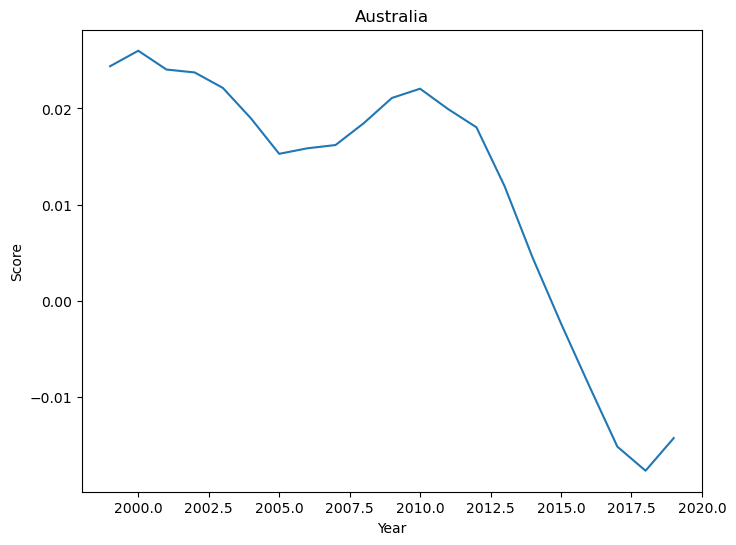

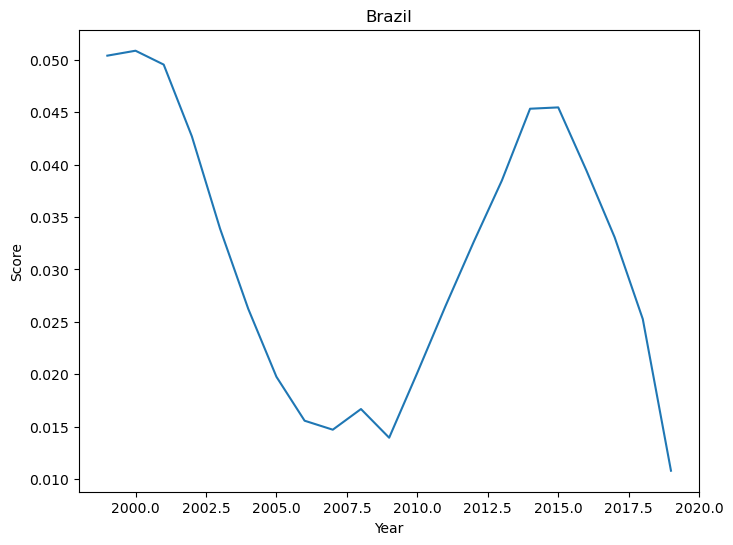

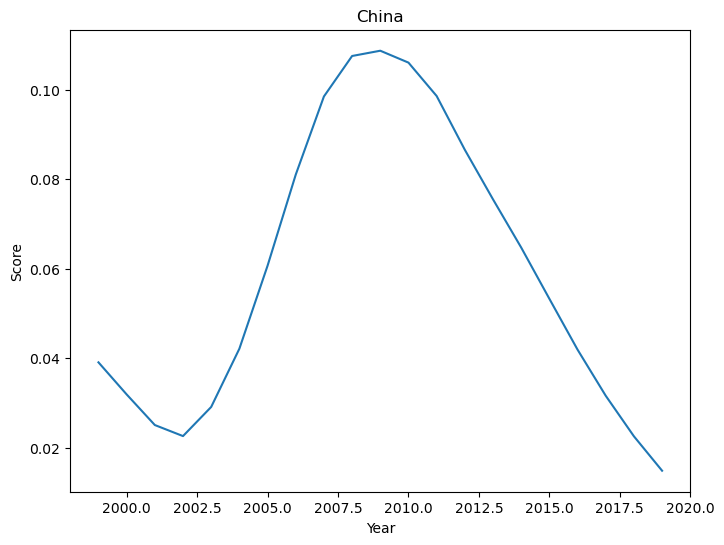

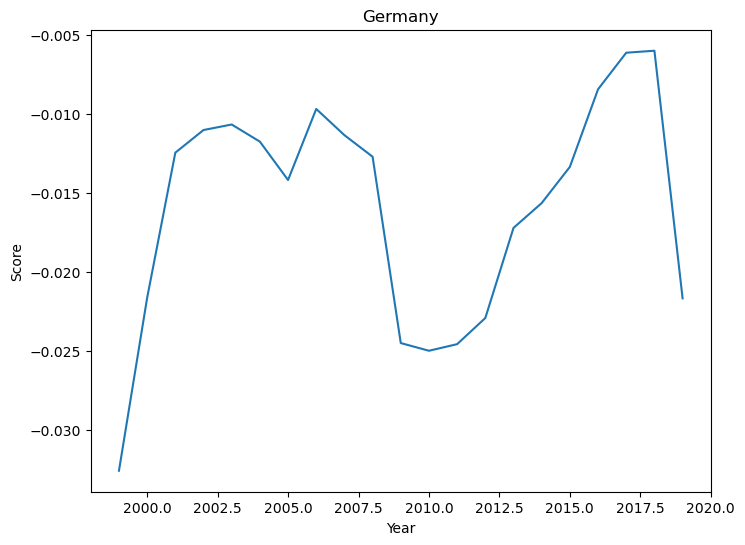

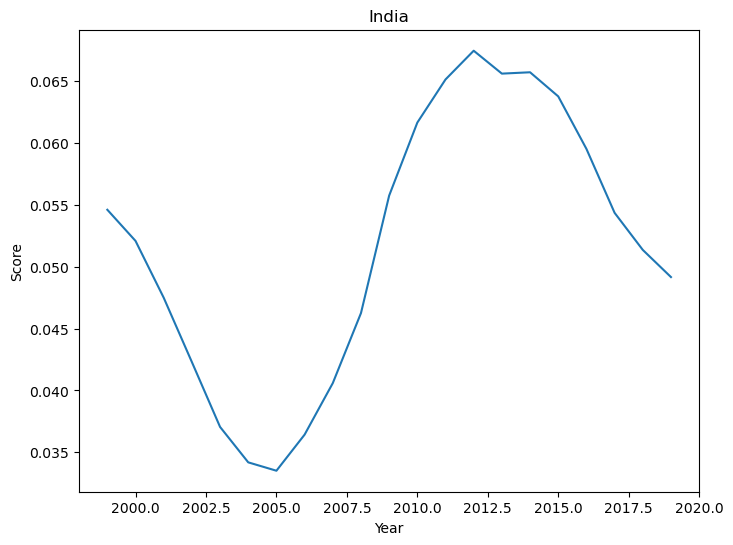

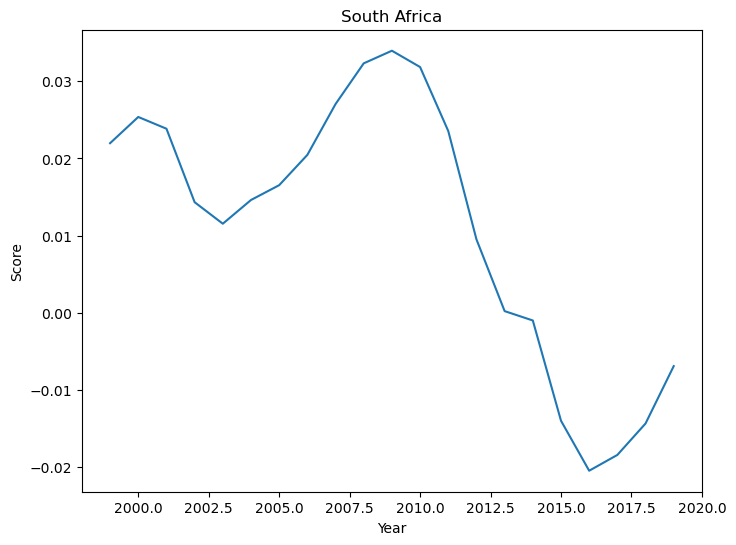

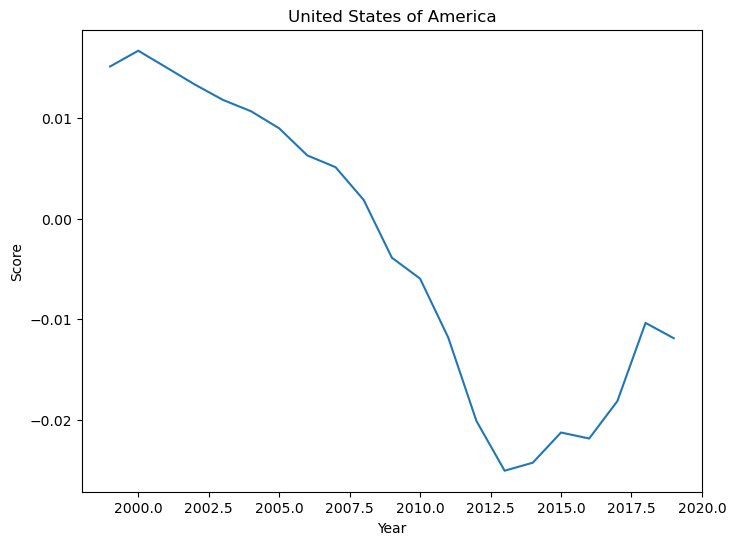

In [7]:
for country, data in df_long.groupby('country'):
    fig, ax = plt.subplots(figsize=(8, 6))
    
    ax.plot(data['index'], data['value'], label=country)
    ax.set_title(country)
    ax.set_xlabel('Year')
    ax.set_ylabel('Score')

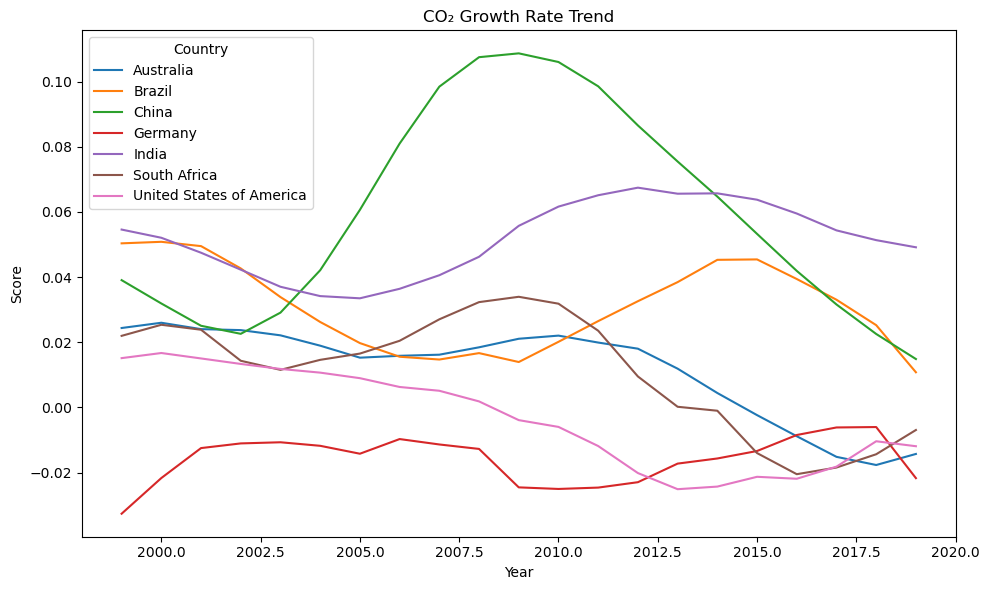

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))

for country, data in df_long.groupby('country'):
    ax.plot(data['index'], data['value'], label=country)

ax.set_title('CO\u2082 Growth Rate Trend')
ax.set_xlabel('Year')
ax.set_ylabel('Score')
ax.legend(loc='best', title='Country') 

fig.tight_layout()
plt.savefig("CDA.png")
plt.show()